# PRACTICA 4 - Algoritmos Genéticos
Iván Fernandez París

Javier Fraile Iglesias

**Nota**

*Si se ejecuta el notebook, las explicaciones del apartado 2 sobre los individuos no serán coherentes con las explicaciones*

# Apartado 1

## Generacion de poblacion inicial

Para generar la poblacion inicial, necesitamos dos cosas:

1. Numero maximo de reglas generadas por individuo -> Esto se pasa como parametro por argumentos (por defecto 5)
2. Longitud de la regla -> Esto se calcula con el metodo "definir_longitud_regla", que guarda la longitud de cada regla en una variable de clase una vez se intancia el modelo de AlgoritmoGenetico.*

*Esto se hace asi porque la longitud de la regla se debe hacer sobre todos los datos, ya que si tan solo lo hacemos con los datos de train por ejemplo, se puede dar que haya algun valor de alguna columna que no aparezca y con lo cual no se tenga en cuenta para la longitud en bits de la regla*

3. Tamaño de la poblacion -> Especificado tambien como parametros, contempla el numero de individuos que queremos generar y posteriormente evolucionar

Una vez especificamos los parametros, para generar esta poblacion inicial, se generan N individuos (tantos como tamaño de la poblacion), con I reglas (generadas aleatoriamente de 1 a I, siendo I el maximo de reglas por individuo especificada), de longitud de bits J [0, 1] (elegidos aleatoriamente, donde J es la longitud de la regla calculada anteriormente).

*Funcion que genera tantos N individuos como se especifiquen*

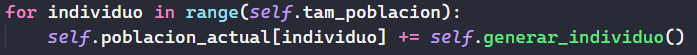

*Contenido dentro de la funcion generar_individuo, que genera I reglas random de (1, I), con longitud de regla J*



## Mecanismo de cruce implementado

El mecanismo de cruce implementado es el cruce de **intra-reglas**, que intercambia el material genetico parcial de una de las reglas (aleatoria) de un progenitor por el material genetico parcial (mismo que el primero) de una de las reglas (tambien aleatoria) del otro progenitor.

## Mecanismo de mutación implementado

El mecanismo de mutacion aplicada es la mutacion estandar aplicada a una sola regla (escogida aleatoriamente), y se ha implementado de la siguiente manera:

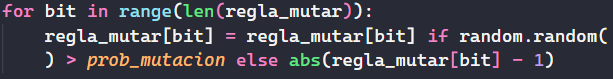

Donde se recorre el tamaño de la regla, y si una probabilidad aleatoria es mayor a 0.1 (establecida estaticamente), se mantiene el bit, pero si no, se hace |Xi - 1|, que es lo mismo que cambiar 0 por 1 o viceversa (Bit flip).

## Mecanismo de clasificacion implementado

Para clasificar, se reutiliza la misma funcion que utilizabamos para calcular el fitness, donde devolviamos los aciertos y errores; pero esta vez lo que se va a devolver es la prediccion que se realiza en funcion del mejor individuo. Esto es:

1. Se compara el individuo con cada una de las reglas del mejor individuo. De esta manera se sacan las activaciones con cada una de las reglas.
2. Si se activan todos los atributos de una regla, entonces guardamos el bit de la clase que predice la regla en una lista de predicciones.
3. Se repite el proceso para cada una de las reglas del mejor individuo.
4. Se devuelve ahora la moda de las predicciones. La moda dice que clase (en nuestro caso 0 o 1) se repite más.
5. En caso de empates, esta funcion devuelve la primera clase que se metio en la lista de predicciones.
6. En caso de que no haya ninguna regla que active (lista de predicciones vacia), se va a devolver -1, o clase no existente, ya que queremos que de error en esa prediccion.

A continuacion se muestra el codigo para ver las activaciones de cada regla por cada atributo

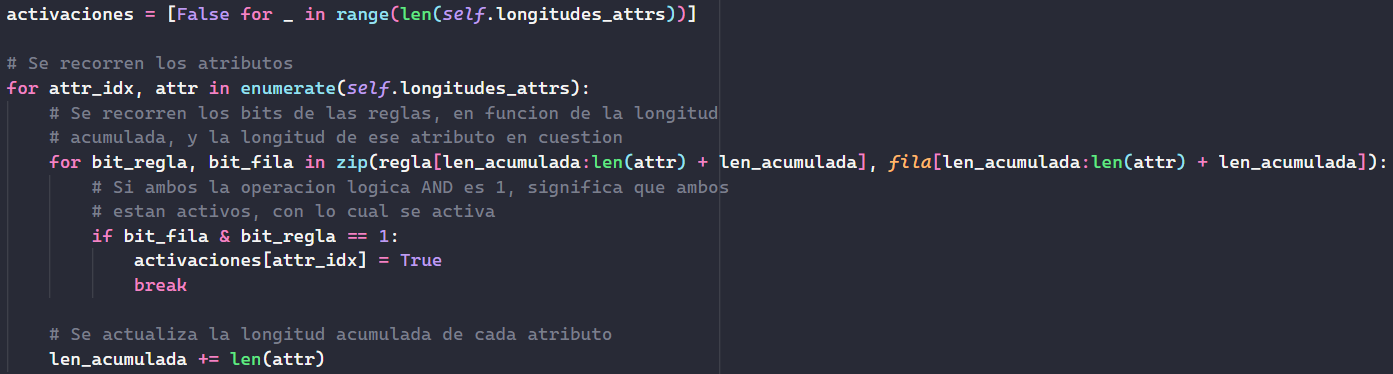

Una vez que rellena ese array de activaciones (Simplemente, cuando hay una activacion en cualquier bit del atributo, lo pone a True en su posicion correspondiente), se mira ahora si hay algun False (Eso significa que hay algun atributo que no se activo), entonces no se hace nada, en caso contrario, se mete la clase correspondiente:

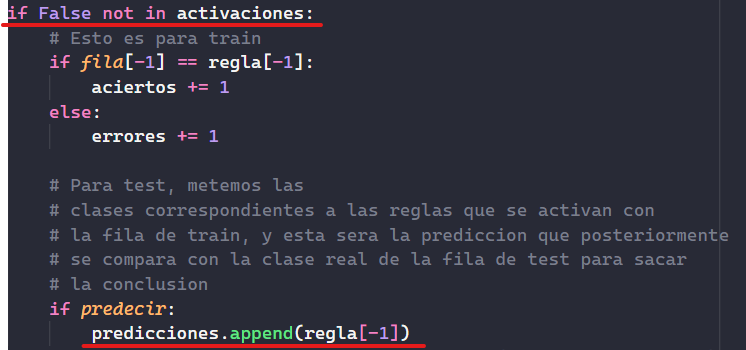

Cuando tenemos el array de predicciones de aquellas reglas que activan todos sus atributos, ahora tan solo se devuleve la moda:

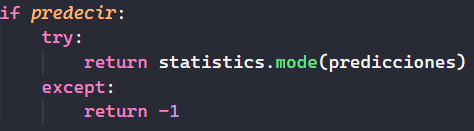

# Apartado 2

In [2]:
from Datos import Datos
import EstrategiaParticionado
from AlgoritmoGenetico import AlgoritmoGenetico

import matplotlib.pyplot as plt
import numpy as np

In [9]:
dataset_xor = Datos('./xor.csv')
dataset_titanic = Datos('./titanic.csv')

# Vamos a utlizar la estrategia de Validacion Simple implementada con 30% de test para 1 ejecucion
estrategia = EstrategiaParticionado.ValidacionSimple(
    numeroEjec=1, propTest=30)

## Resultados sobre el dataset XOR

*Si se ejecutan las celdas varía el resultado, y las explicaciones más abajo de los individuos obtenidos no tendrán sentido*

In [19]:
# Estos son los clasificadores que vamos a utilizar con los distintos parametros

classAG_50_50 = AlgoritmoGenetico(tam_poblacion=50, num_generaciones=50, max_reglas=5, elitismo=5, logs=True)
classAG_50_100 = AlgoritmoGenetico(tam_poblacion=50, num_generaciones=100, max_reglas=5, elitismo=5, logs=True)
classAG_100_50 = AlgoritmoGenetico(tam_poblacion=100, num_generaciones=50, max_reglas=5, elitismo=5, logs=True)
classAG_100_100 = AlgoritmoGenetico(tam_poblacion=100, num_generaciones=100, max_reglas=5, elitismo=5, logs=True)

In [20]:
print("---Normalizacion---")
print(dataset_xor.diccionarios)

# Se define la longitud de la regla sobre todos los datos, para que no haya posibles valores que no se tengan en cuenta
classAG_50_50.definir_longitud_regla(dataset_xor)
classAG_50_100.definir_longitud_regla(dataset_xor)
classAG_100_50.definir_longitud_regla(dataset_xor)
classAG_100_100.definir_longitud_regla(dataset_xor)

print("---Poblacion:50, epocas:50---")
errores_50_50 = classAG_50_50.validacion(estrategia, dataset_xor)
print("% error", errores_50_50)

print("---Poblacion:50, epocas:100---")
errores_50_100 = classAG_50_100.validacion(estrategia, dataset_xor)
print("% error", errores_50_100)

print("---Poblacion:100, epocas:50---")
errores_100_50 = classAG_100_50.validacion(estrategia, dataset_xor)
print("% error", errores_100_50)

print("---Poblacion:100, epocas:100---")
errores_100_100 = classAG_100_100.validacion(estrategia, dataset_xor)
print("% error", errores_100_100)

---Normalizacion---
{'X1': {'+': 0, '-': 1}, 'X2': {'+': 0, '-': 1}, 'Class': {'+': 0, '-': 1}}
---Poblacion:50, epocas:50---
Mejor individuo:  [[1, 0, 1, 0, 1], [0, 1, 0, 1, 1], [0, 1, 1, 0, 0], [1, 0, 0, 1, 0]]
Fitness del mejor individuo:  1.0
% error 0.0
---Poblacion:50, epocas:100---
Mejor individuo:  [[0, 1, 0, 1, 1], [1, 0, 0, 1, 0], [0, 1, 1, 0, 0], [1, 0, 1, 0, 1]]
Fitness del mejor individuo:  1.0
% error 0.0
---Poblacion:100, epocas:50---
Mejor individuo:  [[1, 0, 0, 1, 0], [1, 0, 0, 1, 0], [0, 1, 1, 0, 0], [0, 1, 0, 1, 1], [1, 0, 1, 1, 1]]
Fitness del mejor individuo:  1.0
% error 0.0
---Poblacion:100, epocas:100---
Mejor individuo:  [[1, 0, 1, 0, 1], [0, 1, 0, 1, 1], [1, 0, 1, 0, 1], [1, 0, 0, 1, 0], [0, 1, 1, 0, 0]]
Fitness del mejor individuo:  1.0
% error 0.0


Como se puede observar, al normalizar, nos queda que 0 = '+'

Con lo cual teniendo esto en cuenta, sabemos que con la notacion OneHotEncoder, si el primer bit esta activo, corresponde al +

1. Para la poblacion de **50 epocas y 50 individuos/epoca**, y la de **100 epocas y 50 individuos**, que da la casualidad que coinciden en numero de reglas tenemos:

    El mejor individuo tiene 4 reglas que traducidas indican:
    * Regla1: +, + = -
    * Regla2: -, - = -
    * Regla3: -, + = +
    * Regla4: +, - = +

*Con lo cual al ser todas las reglas correctas, y siendo todas las posibles, la clasificacion es perfecta.*
2. Para la poblacion de **50 epocas y 100 individuos** tenemos:

    El mejor individuo con 5 reglas, traducidas indican:
    * Regla1: +, - = +
    * Regla2: +, - = + (Repetida)
    * Regla3: -, + = +
    * Regla4: -, - = -
    * Regla5: +, * = - (Cualquier cosa que venga en el segundo parametro es aceptada)

*En este caso mencionar que, para todo ejemplo de test que venga de la forma (+, -), va a clasificar como +, porque si nos damos cuenta, las dos primeras reglas que estan repetidas, contrarestan a la regla quinta. De la manera que se ha implementado, tendriamos un array con tres clases para ese caso = [0,0,1] y al ser 0 la clase mayoritaria, corrige la contradiccion que haya podido causar esa regla5.*
3. Para la poblacion de **100 epocas y 100 individuos** tenemos:

    El mejor individuo con 5 reglas tambien de la manera:
    * Regla1: +, + = -
    * Regla2: -, - = -
    * Regla3: +, + = - (Repetida)
    * Regla4: +, - = +
    * Regla5: -, + = +

*A pesar de que haya una regla repetida, no modifica en nada la clasificacion, que sigue siendo perfecta.*

En el caso del dataset XOR, no es necesario un entrenamiento de 100 epocas, ni tampoco hace falta tantos individuos (ya que no hay muchas variaciones de individuos por la longitus de la regla), con lo cual con 50 y 50 valdría para una perfecta clasificacion.

## Resultados sobre el dataset TITANIC

In [21]:
# Estos son los clasificadores que vamos a utilizar con los distintos parametros

classAG_50_50 = AlgoritmoGenetico(tam_poblacion=50, num_generaciones=50, max_reglas=5, elitismo=5, logs=True)
classAG_50_100 = AlgoritmoGenetico(tam_poblacion=50, num_generaciones=100, max_reglas=5, elitismo=5, logs=True)
classAG_100_50 = AlgoritmoGenetico(tam_poblacion=100, num_generaciones=50, max_reglas=5, elitismo=5, logs=True)
classAG_100_100 = AlgoritmoGenetico(tam_poblacion=100, num_generaciones=100, max_reglas=5, elitismo=5, logs=True)

In [22]:
print("---Normalizacion---")
print(dataset_titanic.diccionarios)

# Se define la longitud de la regla sobre todos los datos, para que no haya posibles valores que no se tengan en cuenta
classAG_50_50.definir_longitud_regla(dataset_titanic)
classAG_50_100.definir_longitud_regla(dataset_titanic)
classAG_100_50.definir_longitud_regla(dataset_titanic)
classAG_100_100.definir_longitud_regla(dataset_titanic)

print("Poblacion:50, epocas:50")
errores_50_50 = classAG_50_50.validacion(estrategia, dataset_titanic)
print("errores", errores_50_50)

print("Poblacion:50, epocas:100")
errores_50_100 = classAG_50_100.validacion(estrategia, dataset_titanic)
print("errores", errores_50_100)

print("Poblacion:100, epocas:50")
errores_100_50 = classAG_100_50.validacion(estrategia, dataset_titanic)
print("errores", errores_100_50)

print("Poblacion:100, epocas:100")
errores_100_100 = classAG_100_100.validacion(estrategia, dataset_titanic)
print("errores", errores_100_100)

---Normalizacion---
{'Pclass': {}, 'Sex': {'female': 0, 'male': 1}, 'Age': {}, 'Class': {}}
Poblacion:50, epocas:50
Mejor individuo:  [[1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0], [1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0], [1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0], [1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0]]
Fitness del mejor individuo:  0.6285714285714286
errores 0.39166666666666666
Poblacion:50, epocas:100
Mejor individuo:  [[1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1], [0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0], [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0], [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0], [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0]]
Fitness del mejor individuo:  0.7535714285714286
errores 0.225
P

En este caso no tenemos un dataset tan trivial como el anterior asi que vamos a ver cada atributo:
* Pclass tiene la posible codificacion en 3 bits [*, *, *]
* El sexo si que se codifica de la manera: [0, 1] Male y [1, 0] female
* La edad esta comprendida entre 0 y 15, con lo cual 16 bits: [*, *, *, *, ..., *]
* Finalemente la clase que no tenemos mas informacion mas alla de que es 0 o 1, pero podemos interpretar que es [sobrevive, no]


1. Para la poblacion de **50 epocas y 50 individuos/epoca**:

    El mejor individuo tiene 5 reglas que traducidas indican:
    * Regla1: 1 Pclass, Male, {0, 1, 2, 6, 8, 11, 12, 14, 15} años = 0
    * Regla2: {1, 2, 3}Pclass, {Male, Female}, {2, 3, 5, 6, 7, 9, 12, 14, 15} años = 0
    * Regla3: {1, 3}Pclass, {Male, Female}, {0, 4, 8, 10, 12, 15} años = 0
    * Regla4: {1, 2, 3}Pclass, {Male, Female}, {2, 3, 5, 6, 7, 9, 10, 11, 13} años = 0
    * Regla5: {1, 2, 3}Pclass, {Male, Female}, {0, 1, 2, 3, 4, 5, 8, 10, 15} años = 0

*En este caso, se ha dado que en el mejor individuo, todas las reglas clasifican 0. Por eso el fitness 0.63, no es ninguna maravilla. De hecho, probablemente se ha hecho con la victoria como individuo, debido a que entre esas 5 reglas estan todas las posibles combinaciones, de clase 0, luego nunca falla para individuos de esta clase. No obstante falla en todas las de clase 1. Pero se ha dado la situacion de que el 63% de los datos de train eran de clase 0 (como nos muestra el fitness)*

2. Para la poblacion de **100 epocas y 100 individuos/epoca**:

    El mejor individuo tiene 5 reglas que traducidas indican:
    * Regla1: {1, 2}Pclass, Female, {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15} años = 1
    * Regla2: {1, 2}Pclass, Female, {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15} años = 1 (Repetida)
    * Regla3: 3 Pclass, Female, {0, 2, 3, 8, 9, 10, 12, 14} años = 0
    * Regla4: {1, 2, 3}Pclass, Male, {0, 1, 2, 4, 6, 7, 8, 9, 10, 13, 14} años = 0
    * Regla5: {1, 2, 3}Pclass, {Male, Female}, {0, 1, 3, 4, 5, 6, 7, 9, 11, 12, 14, 15} años = 0

*En este caso, tenemos las dos reglas que clasifican al individuo con la clase 1, son iguales, lo que reforzará en el caso de empates, el tirar por esta eleccion de clase. El resto de casos son de clase 0. Asi que la causa de que tengamos un 19% de fallos probablemente sea aquellos individuos de test que sean de clase 1 y no cumplan esa regla repetida que les clasificaria como clase 1*

En el caso del dataset TITANIC, si que resulta interesante realizar un entrenamiento mas amplio, no tanto en epocas, donde vemos que los resultados entre 50 y 100 epocas son parecidos, pero sí en numero de individuos, donde claramente al tener reglas mas amplias, el tener mas individuos beneficia los resultados.

# Apartado 3

En el anterior apartado analizabamos los individuos, asi como el numero de epocas y el tamaño de la poblacion eran parametros importantes y llegamos a la conclusion de que tamaños grandes son mejores si las longitudes de las reglas son tambien grandes, ya que permite crear un individuo con mayor exactitud.

## Numero de Reglas/Individuo

Vamos a realizar una prueba sobre el dataset de TITANIC variando el numero de reglas de 1 as 5, dejando 100 epocas y 100 individuos/epoca, que sabemos que es el mejor para este dataset

In [27]:
classAG_1 = AlgoritmoGenetico(tam_poblacion=100, num_generaciones=100, max_reglas=1, elitismo=5, logs=True)
classAG_2 = AlgoritmoGenetico(tam_poblacion=100, num_generaciones=100, max_reglas=2, elitismo=5, logs=True)
classAG_3 = AlgoritmoGenetico(tam_poblacion=100, num_generaciones=100, max_reglas=3, elitismo=5, logs=True)
classAG_4 = AlgoritmoGenetico(tam_poblacion=100, num_generaciones=100, max_reglas=4, elitismo=5, logs=True)
classAG_5 = AlgoritmoGenetico(tam_poblacion=100, num_generaciones=100, max_reglas=5, elitismo=5, logs=True)

In [28]:
# Se define la longitud de la regla sobre todos los datos, para que no haya posibles valores que no se tengan en cuenta
classAG_1.definir_longitud_regla(dataset_titanic)
classAG_2.definir_longitud_regla(dataset_titanic)
classAG_3.definir_longitud_regla(dataset_titanic)
classAG_4.definir_longitud_regla(dataset_titanic)
classAG_5.definir_longitud_regla(dataset_titanic)

print("Max reglas 1")
errores_1 = classAG_1.validacion(estrategia, dataset_titanic)
print("errores", errores_1)

print("Max reglas 2")
errores_2 = classAG_2.validacion(estrategia, dataset_titanic)
print("errores", errores_2)

print("Max reglas 3")
errores_3 = classAG_3.validacion(estrategia, dataset_titanic)
print("errores", errores_3)

print("Max reglas 4")
errores_4 = classAG_4.validacion(estrategia, dataset_titanic)
print("errores", errores_4)

print("Max reglas 5")
errores_5 = classAG_5.validacion(estrategia, dataset_titanic)
print("errores", errores_5)

Max reglas 1
Mejor individuo:  [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]]
Fitness del mejor individuo:  0.6285714285714286
errores 0.39166666666666666
Max reglas 2
Mejor individuo:  [[1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0]]
Fitness del mejor individuo:  0.6285714285714286
errores 0.39166666666666666
Max reglas 3
Mejor individuo:  [[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0], [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1], [1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0]]
Fitness del mejor individuo:  0.7785714285714286
errores 0.14166666666666666
Max reglas 4
Mejor individuo:  [[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0], [1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0], [0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0]]
Fitness del mejor individuo: 

Aqui se pueden sacar varias conclusiones:

**1. Tener una sola regla no sirve**

Si tenemos una sola regla, solo va a poder clasificar los ejemplos de una clase, el resto dara error.

**2. El numero de reglas impar funciona mejor que pares**

Ya que los numeros impares ayudan a eliminar empates. Poniendonos en el caso de que todas las reglas se activen, el tener 3 o 5, siempre habra una regla que desempatará. Cosa que no pasa con los pares, donde en caso de empate, devuelve la clase de la primera regla del individuo en nuestro caso.

## Probabilidad de mutacion y cruce

Vamos a probar tambien variando estas tasas que se pasan como parametros, empezaremos con la mutacion, que la haremos variar desde 0 a 100% sobre el dataset TITANIC como antes. *La probabilidad de cruce es 0 (solo se realiza mutacion)*


**Nota importante**

Cuando realizamos el bitflip como se indica en el apartado 1, la probabilidad de cambiar de bit es del 10% de manera estática

In [36]:
classAG_mut_0 = AlgoritmoGenetico(tam_poblacion=100, num_generaciones=100, max_reglas=5, prob_cruce=0, prob_mutacion=0.25, elitismo=5, logs=True)
classAG_mut_25 = AlgoritmoGenetico(tam_poblacion=100, num_generaciones=100, max_reglas=5, prob_cruce=0, prob_mutacion=0.25, elitismo=5, logs=True)
classAG_mut_50 = AlgoritmoGenetico(tam_poblacion=100, num_generaciones=100, max_reglas=5, prob_cruce=0, prob_mutacion=0.5, elitismo=5, logs=True)
classAG_mut_75 = AlgoritmoGenetico(tam_poblacion=100, num_generaciones=100, max_reglas=5, prob_cruce=0, prob_mutacion=0.75, elitismo=5, logs=True)
classAG_mut_100 = AlgoritmoGenetico(tam_poblacion=100, num_generaciones=100, max_reglas=5, prob_cruce=0, prob_mutacion=1, elitismo=5, logs=True)

In [37]:
# Se define la longitud de la regla sobre todos los datos, para que no haya posibles valores que no se tengan en cuenta
classAG_mut_0.definir_longitud_regla(dataset_titanic)
classAG_mut_25.definir_longitud_regla(dataset_titanic)
classAG_mut_50.definir_longitud_regla(dataset_titanic)
classAG_mut_75.definir_longitud_regla(dataset_titanic)
classAG_mut_100.definir_longitud_regla(dataset_titanic)

print("Mutacion al 0%")
errores_0 = classAG_mut_0.validacion(estrategia, dataset_titanic)
print("errores", errores_0)

print("Mutacion al 25%")
errores_25 = classAG_mut_25.validacion(estrategia, dataset_titanic)
print("errores", errores_25)

print("Mutacion al 50%")
errores_50 = classAG_mut_50.validacion(estrategia, dataset_titanic)
print("errores", errores_50)

print("Mutacion al 75%")
errores_75 = classAG_mut_75.validacion(estrategia, dataset_titanic)
print("errores", errores_75)

print("Mutacion al 100%")
errores_100 = classAG_mut_100.validacion(estrategia, dataset_titanic)
print("errores", errores_100)

Mutacion al 0%
Mejor individuo:  [[1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0], [1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1]]
Fitness del mejor individuo:  0.5642857142857143
errores 0.425
Mutacion al 25%
Mejor individuo:  [[0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1], [0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1], [1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0], [0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0], [0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0]]
Fitness del mejor individuo:  0.5214285714285715
errores 0.5416666666666666
Mutacion al 50%
Mejor individuo:  [[1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0], [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1], [1, 0, 0,

Como era de esperar, cuando solo la mutacion esta involucrada, es preferible que mayor numero de individuos mute porque si no, no va a haber evolucion.

Como con el cruce poblablemente pase lo mismo si hacemos una variacion solo de cruce del 0 al 100, vamos ahora directamente a realizar una variacion aumentando ambas a la vez:

In [46]:
classAG_0 = AlgoritmoGenetico(tam_poblacion=100, num_generaciones=100, max_reglas=5, prob_cruce=0, prob_mutacion=0, elitismo=5, logs=True)
classAG_25 = AlgoritmoGenetico(tam_poblacion=100, num_generaciones=100, max_reglas=5, prob_cruce=0.25, prob_mutacion=0.25, elitismo=5, logs=True)
classAG_50 = AlgoritmoGenetico(tam_poblacion=100, num_generaciones=100, max_reglas=5, prob_cruce=0.5, prob_mutacion=0.5, elitismo=5, logs=True)
classAG_75 = AlgoritmoGenetico(tam_poblacion=100, num_generaciones=100, max_reglas=5, prob_cruce=0.75, prob_mutacion=0.75, elitismo=5, logs=True)
classAG_100 = AlgoritmoGenetico(tam_poblacion=100, num_generaciones=100, max_reglas=5, prob_cruce=1, prob_mutacion=1, elitismo=5, logs=True)

In [47]:
# Se define la longitud de la regla sobre todos los datos, para que no haya posibles valores que no se tengan en cuenta
classAG_0.definir_longitud_regla(dataset_titanic)
classAG_25.definir_longitud_regla(dataset_titanic)
classAG_50.definir_longitud_regla(dataset_titanic)
classAG_75.definir_longitud_regla(dataset_titanic)
classAG_100.definir_longitud_regla(dataset_titanic)

print("Mutacion y Cruce al 0%")
errores_0 = classAG_0.validacion(estrategia, dataset_titanic)
print("errores", errores_0)

print("Mutacion y Cruce al 25%")
errores_25 = classAG_25.validacion(estrategia, dataset_titanic)
print("errores", errores_25)

print("Mutacion y Cruce al 50%")
errores_50 = classAG_50.validacion(estrategia, dataset_titanic)
print("errores", errores_50)

print("Mutacion y Cruce al 75%")
errores_75 = classAG_75.validacion(estrategia, dataset_titanic)
print("errores", errores_75)

print("Mutacion y Cruce al 100%")
errores_100 = classAG_100.validacion(estrategia, dataset_titanic)
print("errores", errores_100)

Mutacion y Cruce al 0%
Mejor individuo:  [[0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0], [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0], [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]]
Fitness del mejor individuo:  0.5785714285714286
errores 0.425
Mutacion y Cruce al 25%
Mejor individuo:  [[1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0], [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0], [1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1], [0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], [0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0]]
Fitness del mejor individuo:  0.75
errores 0.26666666666666666
Mutacion y Cruce al 50%
Mejor individuo:  [[1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0], [1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1]

Realmente, descartando la del 0%, donde directamente no hay evolucion, en el resto apenas se aprecian diferencias en clasificacion, y en el fitness del mejor individuo.

Por ello, vamos a hacer un adelanto del siguiente apartado para ver como varia el fitness medio de la poblacion:

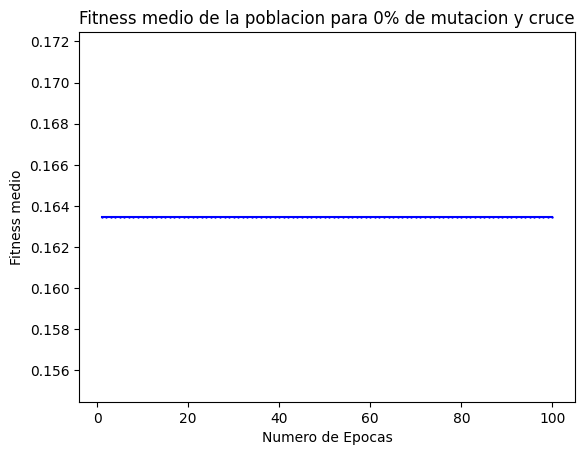

In [48]:
# Plot
X = list(np.arange(1, len(classAG_0.fitness_medio)+1))

plt.scatter(X, classAG_0.fitness_medio, color="blue", s=0.5)
plt.plot(X, classAG_0.fitness_medio, color="blue")

plt.xlabel("Numero de Epocas")
plt.ylabel("Fitness medio")

plt.title("Fitness medio de la poblacion para 0% de mutacion y cruce")


plt.show()

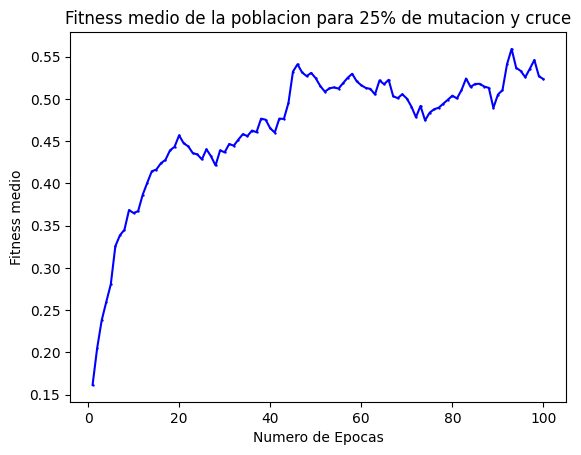

In [49]:
# Plot
X = list(np.arange(1, len(classAG_25.fitness_medio)+1))

plt.scatter(X, classAG_25.fitness_medio, color="blue", s=0.5)
plt.plot(X, classAG_25.fitness_medio, color="blue")

plt.xlabel("Numero de Epocas")
plt.ylabel("Fitness medio")

plt.title("Fitness medio de la poblacion para 25% de mutacion y cruce")


plt.show()

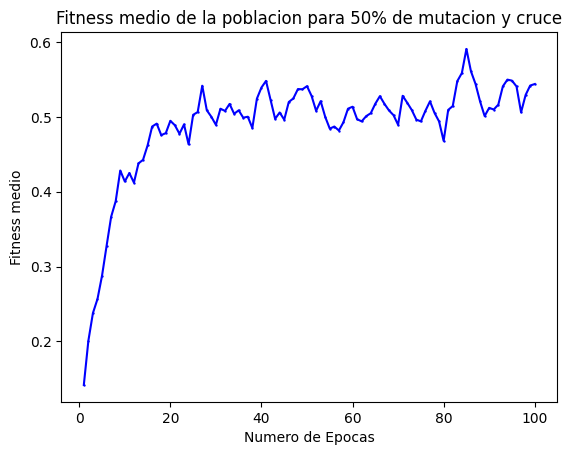

In [50]:
# Plot
X = list(np.arange(1, len(classAG_50.fitness_medio)+1))

plt.scatter(X, classAG_50.fitness_medio, color="blue", s=0.5)
plt.plot(X, classAG_50.fitness_medio, color="blue")

plt.xlabel("Numero de Epocas")
plt.ylabel("Fitness medio")

plt.title("Fitness medio de la poblacion para 50% de mutacion y cruce")


plt.show()

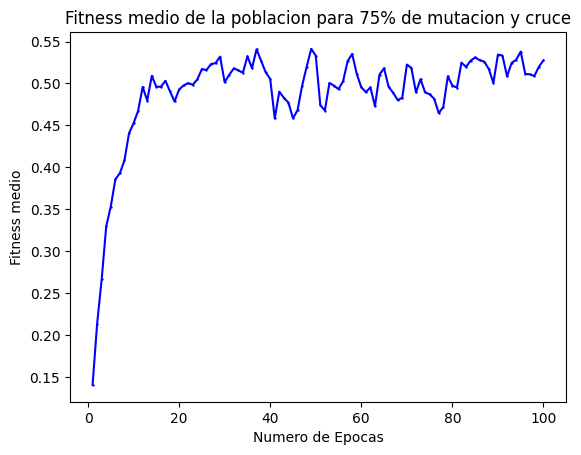

In [51]:
# Plot
X = list(np.arange(1, len(classAG_75.fitness_medio)+1))

plt.scatter(X, classAG_75.fitness_medio, color="blue", s=0.5)
plt.plot(X, classAG_75.fitness_medio, color="blue")

plt.xlabel("Numero de Epocas")
plt.ylabel("Fitness medio")

plt.title("Fitness medio de la poblacion para 75% de mutacion y cruce")


plt.show()

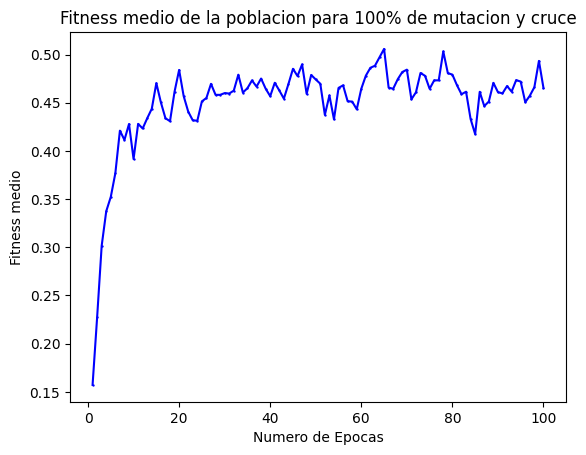

In [52]:
# Plot
X = list(np.arange(1, len(classAG_100.fitness_medio)+1))

plt.scatter(X, classAG_100.fitness_medio, color="blue", s=0.5)
plt.plot(X, classAG_100.fitness_medio, color="blue")

plt.xlabel("Numero de Epocas")
plt.ylabel("Fitness medio")

plt.title("Fitness medio de la poblacion para 100% de mutacion y cruce")


plt.show()

Y como estábamos intuyendo, los cambios entre generaciones del fitness de la poblacion son mas agresivos (más ruido en la grafica), segun vamos aumentando el porcentaje de poblacion cruzada y mutada. Lo cual es logico porque estas alterando el material genetico de manera mas agresiva en los individuos de cada poblacion.

# Apartado 4

Para estas pruebas vamos a utilizar el algoritmo genetico con 100 epocas y 100 individuos por epoca

## Evolucion para Dataset de XOR

In [23]:
classAG_100_100 = AlgoritmoGenetico(tam_poblacion=100, num_generaciones=100, max_reglas=5, elitismo=5, logs=True)
classAG_100_100.definir_longitud_regla(dataset_xor)
classAG_100_100.validacion(estrategia, dataset_xor)

Mejor individuo:  [[1, 0, 1, 0, 1], [1, 0, 0, 1, 0], [0, 1, 0, 1, 1], [1, 0, 0, 0, 0], [0, 1, 1, 0, 0]]
Fitness del mejor individuo:  1.0


0.0

### Evolucion del mejor individuo

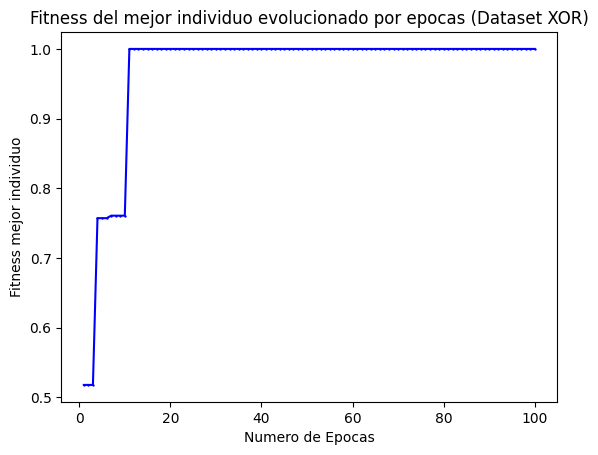

In [24]:
# Plot
X = list(np.arange(1, len(classAG_100_100.fitness_mejor)+1))

plt.scatter(X, classAG_100_100.fitness_mejor, color="blue", s=0.5)
plt.plot(X, classAG_100_100.fitness_mejor, color="blue")

plt.xlabel("Numero de Epocas")
plt.ylabel("Fitness mejor individuo")

plt.title("Fitness del mejor individuo evolucionado por epocas (Dataset XOR)")

plt.show()

EL mejor individuo en XOR, se puede ver que converge muy rapido a fitness de 1 (se ha dado en esta ejecucion, pero puede variar), que clasifica completamente todos los datos de train de manera correcta, y esto se debe a que la longitud de cada reglas es tan solo de 5 bits, y practicamente a fuerza bruta se puede sacar una conbinacion qeu satisfaga a todos los datos de train.

### Evolucion media de la poblacion

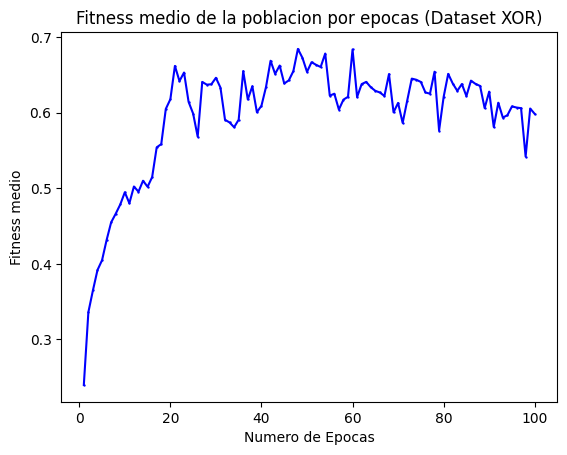

In [25]:
# Plot
X = list(np.arange(1, len(classAG_100_100.fitness_medio)+1))

plt.scatter(X, classAG_100_100.fitness_medio, color="blue", s=0.5)
plt.plot(X, classAG_100_100.fitness_medio, color="blue")

plt.xlabel("Numero de Epocas")
plt.ylabel("Fitness medio")

plt.title("Fitness medio de la poblacion por epocas (Dataset XOR)")


plt.show()

La media de error tambien tiene tendencia ascendente, sobre todo en epocas tempranas, porque al generar los datos aleatorios al principio no suele acertar, y le cuesta unas epocas de configuracion hasta llegar a individuos deseados.

## Evolucion para Dataset de TITANIC

In [26]:
classAG_100_100 = AlgoritmoGenetico(tam_poblacion=100, num_generaciones=100, max_reglas=5, elitismo=5, logs=True)
classAG_100_100.definir_longitud_regla(dataset_titanic)
classAG_100_100.validacion(estrategia, dataset_titanic)

Mejor individuo:  [[1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0], [1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1], [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0], [1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0], [0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]]
Fitness del mejor individuo:  0.7178571428571429


0.30833333333333335

### Evolucion del mejor individuo

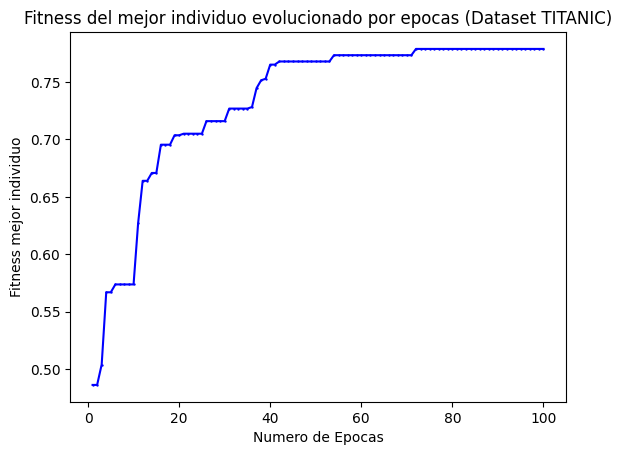

In [5]:
# Plot
X = list(np.arange(1, len(classAG_100_100.fitness_mejor)+1))

plt.scatter(X, classAG_100_100.fitness_mejor, color="blue", s=0.5)
plt.plot(X, classAG_100_100.fitness_mejor, color="blue")

plt.xlabel("Numero de Epocas")
plt.ylabel("Fitness mejor individuo")

plt.title("Fitness del mejor individuo evolucionado por epocas (Dataset TITANIC)")

plt.show()

En este caso, el fitness del mejor individuo no converge a 1, pero si que se puede ver que la evolucion es claramente ascendente. Tambien tarda más epocas en llegar a ese punto de fitness maximo, lo cual tambien es logico por la  longitud de la cadena que mencionábamos 

### Evolucion media de la poblacion

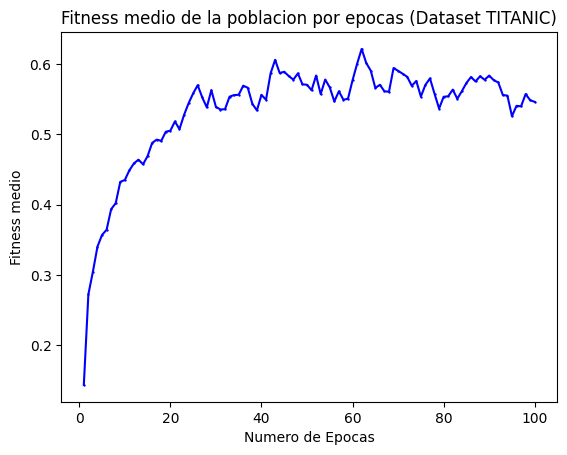

In [6]:
# Plot
X = list(np.arange(1, len(classAG_100_100.fitness_medio)+1))

plt.scatter(X, classAG_100_100.fitness_medio, color="blue", s=0.5)
plt.plot(X, classAG_100_100.fitness_medio, color="blue")

plt.xlabel("Numero de Epocas")
plt.ylabel("Fitness medio")

plt.title("Fitness medio de la poblacion por epocas (Dataset TITANIC)")


plt.show()

En el caso del fitness medio, es curioso observar que llega un punto (en el que se alcanza el fitness maximo), que pasa en todas las ejecuciones que hemos realizado anteriormente de fitness medio, en el cual, ya no mejora la poblacion, y de hecho decrece. Esto pensamos que se debe a que una vez alcanzado ese fitness maximo, el margen de mejora es muy pequeño, pero esa es la diferencia entre tener un fitness bueno a uno malo.

En resumen, que si se copian las reglas de los mejores individuos (por la ruleta), y se alteran, es muy dificil que esa alteracion mejore el fitness, pero es muy facil que lo empeore.